# Census Data from Houston

In [317]:
# download the libraries
from census import Census
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from us import states
from census.core import ACSClient

# initialize the Census API
c = Census('6315b517232d3a888d9abd180f19bfc48c6fa7c8')

In [318]:
# Patch the ACSClient to handle 'long' data type
def field_type(self, field, year):
    types = {
        'int': int,
        'float': float,
        'string': str,
        'long': int  # Add this line
    }
    return types.get(field, str)

ACSClient._field_type = field_type

In [190]:
# Fetch the list of ACS 5-year tables
tables = c.acs5.tables()

# Filter tables containing the word 'age'
age_tables = [table for table in tables if 'english' in table['description'].lower()]

# Display the filtered tables
for table in age_tables:
    print(f"Table ID: {table['name']}, Description: {table['description']}")# Example table ID to get variables
table_id = "B01001"

# Fetch variables for the table
variables = c.acs5.table(table_id)

# Display the table and its variables
print(f"Table ID: {table_id}")
print("Variables:")
for variable in variables['variables']:
    print(f"{variable}: {variables['variables'][variable]['label']}")

Table ID: B08513, Description: MEANS OF TRANSPORTATION TO WORK BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH FOR WORKPLACE GEOGRAPHY
Table ID: B26113, Description: GROUP QUARTERS TYPE (3 TYPES) BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH
Table ID: C16002, Description: HOUSEHOLD LANGUAGE BY HOUSEHOLD LIMITED ENGLISH SPEAKING STATUS
Table ID: B06007PR, Description: PLACE OF BIRTH BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH IN PUERTO RICO
Table ID: B06007, Description: PLACE OF BIRTH BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH IN THE UNITED STATES
Table ID: B16005F, Description: NATIVITY BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER (SOME OTHER RACE ALONE)
Table ID: B16005G, Description: NATIVITY BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER (TWO OR MORE RACES)
Table ID: B16005H, Description: NATIVITY BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH 

AttributeError: 'ACS5Client' object has no attribute 'table'

In [319]:
# create list of demographic data
variable_list = ['B19001_001E', 
                'B15003_001E', 'B15003_017E', 'B15003_018E', 
                'B08201_001E', 'B08201_002E',
                'B23025_001E', 'B23025_002E', 'B23025_007E', 
                'B05001_001E', 'B05001_006E', 
                'B16004_001E', 'B16004_007E', 'B16004_008E', 'B16004_012E', 'B16004_013E', 'B16004_017E', 
                'B16004_018E', 'B16004_022E', 'B16004_023E', 'B16004_029E', 'B16004_030E', 'B16004_034E',
                'B16004_035E', 'B16004_039E', 'B16004_040E', 'B16004_044E', 'B16004_045E', 'B16004_051E',
                'B16004_052E', 'B16004_056E', 'B16004_057E', 'B16004_061E', 'B16004_062E', 'B16004_066E', 'B16004_067E',
                'B01001_001E', 'B01001_018E', 'B01001_019E', 'B01001_020E', 'B01001_021E',
                'B01001_022E', 'B01001_023E', 'B01001_024E', 'B01001_025E', 'B01001_042E', 'B01001_043E',
                'B01001_044E', 'B01001_045E', 'B01001_046E', 'B01001_047E', 'B01001_048E', 'B01001_049E',
                'B01001_005E', 'B01001_006E', 'B01001_007E', 'B01001_029E', 'B01001_030E', 'B01001_031E',
                'B18101_001E', 'B18101_004E', 'B18101_007E', 'B18101_010E', 'B18101_013E', 'B18101_016E', 'B18101_019E',
                'B18101_023E', 'B18101_026E', 'B18101_029E', 'B18101_032E', 'B18101_035E', 'B18101_038E',
                'B08301_001E', 'B08301_010E']

In [320]:
# download census variables for Cook County, IL
data = c.acs5.state_county_tract((variable_list), '48', '201', Census.ALL)

In [321]:
# Make DataFrame
df = pd.DataFrame(data)
df

,B19001_001E,B15003_001E,B15003_017E,B15003_018E,B08201_001E,B08201_002E,B23025_001E,B23025_002E,B23025_007E,B05001_001E,...,B18101_016E,B18101_019E,B18101_023E,B18101_026E,B18101_029E,B18101_032E,B18101_035E,B18101_038E,B08301_001E,B08301_010E
0,2723,4269,508,242,2723,556,4949,3261,1688,4999,...,57,0,0,0,53,35,42,0,3077,142
1,1480,3008,495,394,1480,240,3462,2182,1280,4411,...,43,25,0,0,38,142,22,94,2003,190
2,1770,3371,891,147,1770,464,3865,2367,1498,5013,...,79,11,0,0,0,98,57,263,2129,129
3,2264,4128,957,355,2264,378,4584,2843,1741,5645,...,151,66,0,0,210,113,7,102,2806,17
4,885,1835,455,234,885,36,2115,1252,863,2537,...,5,113,0,28,17,49,29,63,1123,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1111,67,8380,2088,1620,67,0,9712,77,9635,9712,...,0,0,0,0,0,0,0,0,77,4
1112,0,129,0,0,0,0,2770,875,1895,2770,...,0,0,0,0,38,0,0,0,731,29
1113,0,332,0,0,0,0,4134,1267,2867,4134,...,0,0,0,0,75,0,0,0,999,82


In [322]:
# Rename the columns for better readability
df = df.rename(columns={
    'B19001_001E' : 'income',
    'B15003_001E' : 'total_pop_education',
    'B15003_017E' :	'diploma',
    'B15003_018E' : 'ged',
    'B08201_001E' : 'total_vehicle',
    'B08201_002E' :	'no_vehicle',
    'B23025_001E' : 'total_employment',
    'B23025_002E' :	'employed',
    'B23025_007E' : 'unemployed',
    'B05001_001E' : 'total_citizen',
    'B05001_006E' : 'not_us_citizen',
    'B16004_001E' : 'total_language',	
    'B16004_007E' : '5_to_17_spanish_not_well',
    'B16004_008E' : '5_to_17_spanish_not_all',
    'B16004_012E' : '5_to_17_europe_not_well',
    'B16004_013E' : '5_to_17_europe_not_all',
    'B16004_017E' : '5_to_17_asian_not_well',
    'B16004_018E' : '5_to_17_asian_not_all',
    'B16004_022E' : '5_to_17_other_not_well',
    'B16004_023E' : '5_to_17_other_not_all',
    'B16004_029E' : '18_to_64_spanish_not_well',
    'B16004_030E' : '18_to_64_spanish_not_all',
    'B16004_034E' : '18_to_64_europe_not_well',
    'B16004_035E' : '18_to_64_europe_not_all',
    'B16004_039E' : '18_to_64_asian_not_well',
    'B16004_040E' : '18_to_64_asian_not_all',
    'B16004_044E' : '18_to_64_other_not_well',
    'B16004_045E' : '18_to_64_other_not_all',
    'B16004_051E' : 'over_65_spanish_not_well',
    'B16004_052E' : 'over_65_spanish_not_all',
    'B16004_056E' : 'over_65_europe_not_well',
    'B16004_057E' : 'over_65_europe_not_all',
    'B16004_061E' : 'over_65_asian_not_well',
    'B16004_062E' : 'over_65_asian_not_all',
    'B16004_066E' : 'over_65_other_not_well',
    'B16004_067E' : 'over_65_other_not_all',
    'B01001_001E' : 'total_age',
    'B01001_018E' :	'male_60_to_61',
    'B01001_019E' :	'male_62_to_64',
    'B01001_020E' :	'male_65_to_66',
    'B01001_021E' :	'male_67_to_69',
    'B01001_022E' :	'male_70_to_74',
    'B01001_023E' :	'male_75_to_79',
    'B01001_024E' :	'male_80_to_84',
    'B01001_025E' :	'male_over_85',
    'B01001_042E' :	'female_60_to_61',	
    'B01001_043E' :	'female_62_to_64',
    'B01001_044E' :	'female_65_to_66',
    'B01001_045E' :	'female_67_to_69',
    'B01001_046E' :	'female_70_to_74',	
    'B01001_047E' : 'female_75_to_79',	
    'B01001_048E' :	'female_80_to_84',	
    'B01001_049E' :	'female_over_85',
    'B01001_005E' :	'male_10_to_14',
    'B01001_006E' :	'male_15_to_17',
    'B01001_007E' :	'male_18_to_19',
    'B01001_029E' :	'female_10_to_14',
    'B01001_030E' :	'female_15_to_17',
    'B01001_031E' : 'female_18_to_19',
    'B18101_001E' : 'total_disability',
    'B18101_004E' : 'male_under_5_with_disability',
    'B18101_007E' :	'male_5_to_17_with_disability',
    'B18101_010E' : 'male_18_to_34_with_disability',	
    'B18101_013E' : 'male_35_to_64_with_disability',
    'B18101_016E' : 'male_65_to_74_with_disability',
    'B18101_019E' :	'male_over_75_with_disability',
    'B18101_023E' :	'female_under_5_with_disability',
    'B18101_026E' :	'female_5_to_17_with_disability',
    'B18101_029E' :	'female_18_to_34_with_disability',
    'B18101_032E' :	'female_35_to_64_with_disability',
    'B18101_035E' :	'female_65_to_74_with_disability',
    'B18101_038E' :	'female_over_74_with_disability',
    'B08301_001E' : 'total_transit',
    'B08301_010E' :	'public_transit'
    })

In [323]:
# Check if any column has missing values
# Count missing values in each column
missing_count = df.isna().sum()
print(missing_count)

income                             0
total_pop_education                0
diploma                            0
ged                                0
total_vehicle                      0
                                  ..
female_35_to_64_with_disability    0
female_65_to_74_with_disability    0
female_over_74_with_disability     0
total_transit                      0
public_transit                     0
Length: 78, dtype: int64


In [324]:
# List of columns to convert to numeric
columns_to_convert = ['income', 'total_pop_education', 'diploma', 'ged', 'total_vehicle',
       'no_vehicle', 'total_employment', 'employed', 'unemployed',
       'total_citizen', 'not_us_citizen', 'total_language',
       '5_to_17_spanish_not_well', '5_to_17_spanish_not_all',
       '5_to_17_europe_not_well', '5_to_17_europe_not_all',
       '5_to_17_asian_not_well', '5_to_17_asian_not_all',
       '5_to_17_other_not_well', '5_to_17_other_not_all',
       '18_to_64_spanish_not_well', '18_to_64_spanish_not_all',
       '18_to_64_europe_not_well', '18_to_64_europe_not_all',
       '18_to_64_asian_not_well', '18_to_64_asian_not_all',
       '18_to_64_other_not_well', '18_to_64_other_not_all',
       'over_65_spanish_not_well', 'over_65_spanish_not_all',
       'over_65_europe_not_well', 'over_65_europe_not_all',
       'over_65_asian_not_well', 'over_65_asian_not_all',
       'over_65_other_not_well', 'over_65_other_not_all', 'total_age',
       'male_60_to_61', 'male_62_to_64', 'male_65_to_66', 'male_67_to_69',
       'male_70_to_74', 'male_75_to_79', 'male_80_to_84', 'male_over_85',
       'female_60_to_61', 'female_62_to_64', 'female_65_to_66',
       'female_67_to_69', 'female_70_to_74',
       'female_75_to_79', 'female_80_to_84', 'female_over_85', 'male_10_to_14',
       'male_15_to_17', 'male_18_to_19', 'female_10_to_14', 'female_15_to_17',
       'female_18_to_19', 'total_disability', 'male_under_5_with_disability',
       'male_5_to_17_with_disability', 'male_18_to_34_with_disability',
       'male_35_to_64_with_disability', 'male_65_to_74_with_disability',
       'male_over_75_with_disability', 'female_under_5_with_disability',
       'female_5_to_17_with_disability', 'female_18_to_34_with_disability',
       'female_35_to_64_with_disability', 'female_65_to_74_with_disability',
       'female_over_74_with_disability', 'total_transit', 'public_transit']

# Convert specified columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(lambda col: pd.to_numeric(col, errors='coerce'))

print("\nDataFrame after converting specified columns to numeric:")
print(df)


DataFrame after converting specified columns to numeric:
      income  total_pop_education  diploma   ged  total_vehicle  no_vehicle  \
0       2723                 4269      508   242           2723         556   
1       1480                 3008      495   394           1480         240   
2       1770                 3371      891   147           1770         464   
3       2264                 4128      957   355           2264         378   
4        885                 1835      455   234            885          36   
...      ...                  ...      ...   ...            ...         ...   
1110       0                    0        0     0              0           0   
1111      67                 8380     2088  1620             67           0   
1112       0                  129        0     0              0           0   
1113       0                  332        0     0              0           0   
1114    1087                 1196       30    11           1087          

In [325]:
# Calculate the percentage of the population that completed high school
df['percent_higher_ed'] = ((df['diploma'] + df['ged']) / df['total_pop_education'])

In [326]:
# Calculate the percentage of the population that has no access to a car
df['percent_vehicle_access'] = (df['no_vehicle'] / df['total_vehicle'])

In [327]:
# Calculate the percentage of the population that is employed
df['percent_employed'] = (df['employed'] / df['total_employment'])

In [328]:
# Calculate the percentage of the population that are not US citizens
df['percent_citizen'] = (df['not_us_citizen'] / df['total_citizen'])

In [329]:
# Calculate the percentage of the population that speak english not well or not at all
df['percent_english_speaking'] = ((df['5_to_17_spanish_not_well'] + df['5_to_17_spanish_not_all'] + df['5_to_17_europe_not_well'] +
                                df['5_to_17_europe_not_all'] + df['5_to_17_asian_not_well'] + df['5_to_17_asian_not_all'] +
                                df['5_to_17_other_not_well'] + df['5_to_17_other_not_all'] + df['18_to_64_spanish_not_well'] +
                                df['18_to_64_spanish_not_all'] + df['18_to_64_europe_not_well'] + df['18_to_64_europe_not_all'] +
                                df['18_to_64_asian_not_well'] + df['18_to_64_asian_not_all'] + df['18_to_64_other_not_well'] +
                                df['18_to_64_other_not_all'] + df['over_65_spanish_not_well'] + df['over_65_spanish_not_all'] +
                                df['over_65_europe_not_well'] + df['over_65_europe_not_all'] + df['over_65_asian_not_well'] +
                                df['over_65_asian_not_all'] + df['over_65_other_not_well'] + df['over_65_other_not_all'])
                                  / df['total_language'])

In [330]:
# Calculate the percentage of the population that is older than 60
df['percent_older_60'] = ((df['male_60_to_61'] + df['male_62_to_64'] + df['male_65_to_66'] +
                        df['male_67_to_69'] + df['male_70_to_74'] + df['male_75_to_79'] +
                        df['male_80_to_84'] + df['male_over_85'] +
                        df['female_60_to_61'] + df['female_62_to_64'] + df['female_65_to_66'] +
                        df['female_67_to_69'] + df['female_70_to_74'] + df['female_75_to_79'] +
                        df['female_80_to_84'] + df['female_over_85'])
                        / df['total_age'])

In [331]:
# Calculate the percentage of the population that between 10 and 19
df['percent_younger_19'] = ((df['male_10_to_14'] + df['male_15_to_17'] + df['male_18_to_19'] +
                        df['female_10_to_14'] + df['female_15_to_17'] + df['female_18_to_19'])
                        / df['total_age'])

In [332]:
# Calculate the percentage of the population that have a disability
df['percent_disability'] = ((df['male_under_5_with_disability'] + df['male_5_to_17_with_disability'] + df['male_18_to_34_with_disability'] +
                            df['male_35_to_64_with_disability'] + df['male_65_to_74_with_disability'] + 
                            df['male_over_75_with_disability'] + df['female_under_5_with_disability'] + df['female_5_to_17_with_disability'] +
                            df['female_18_to_34_with_disability'] + df['female_35_to_64_with_disability'] + 
                            df['female_65_to_74_with_disability'] + df['female_over_74_with_disability'])
                            / df['total_disability'])

In [333]:
# Calculate the percentage of the population that use public transit to get to work
df['percent_transit'] = (df['public_transit'] / df['total_transit'])
print(df)

      income  total_pop_education  diploma   ged  total_vehicle  no_vehicle  \
0       2723                 4269      508   242           2723         556   
1       1480                 3008      495   394           1480         240   
2       1770                 3371      891   147           1770         464   
3       2264                 4128      957   355           2264         378   
4        885                 1835      455   234            885          36   
...      ...                  ...      ...   ...            ...         ...   
1110       0                    0        0     0              0           0   
1111      67                 8380     2088  1620             67           0   
1112       0                  129        0     0              0           0   
1113       0                  332        0     0              0           0   
1114    1087                 1196       30    11           1087          89   

      total_employment  employed  unemployed  total

In [334]:
print("Original DataFrame:")
print(df)
print("\nChecking for NaN values:")
print(df.isna().sum())
df = df.dropna()
df

Original DataFrame:
      income  total_pop_education  diploma   ged  total_vehicle  no_vehicle  \
0       2723                 4269      508   242           2723         556   
1       1480                 3008      495   394           1480         240   
2       1770                 3371      891   147           1770         464   
3       2264                 4128      957   355           2264         378   
4        885                 1835      455   234            885          36   
...      ...                  ...      ...   ...            ...         ...   
1110       0                    0        0     0              0           0   
1111      67                 8380     2088  1620             67           0   
1112       0                  129        0     0              0           0   
1113       0                  332        0     0              0           0   
1114    1087                 1196       30    11           1087          89   

      total_employment  employe

,income,total_pop_education,diploma,ged,total_vehicle,no_vehicle,total_employment,employed,unemployed,total_citizen,...,public_transit,percent_higher_ed,percent_vehicle_access,percent_employed,percent_citizen,percent_english_speaking,percent_older_60,percent_younger_19,percent_disability,percent_transit
0,2723,4269,508,242,2723,556,4949,3261,1688,4999,...,142,0.175685,0.204187,0.658921,0.163433,0.022882,0.138228,0.004001,0.113593,0.046149
1,1480,3008,495,394,1480,240,3462,2182,1280,4411,...,190,0.295545,0.162162,0.630272,0.147132,0.157029,0.200635,0.147359,0.132153,0.094858
2,1770,3371,891,147,1770,464,3865,2367,1498,5013,...,129,0.307920,0.262147,0.612419,0.176740,0.241305,0.203670,0.144225,0.198883,0.060592
3,2264,4128,957,355,2264,378,4584,2843,1741,5645,...,17,0.317829,0.166961,0.620201,0.129141,0.178707,0.269088,0.104340,0.132861,0.006058
4,885,1835,455,234,885,36,2115,1252,863,2537,...,63,0.375477,0.040678,0.591962,0.135593,0.187857,0.212850,0.182499,0.177375,0.056100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,3495,5884,1569,120,3495,135,7083,5350,1733,10203,...,55,0.287050,0.038627,0.755330,0.114966,0.036775,0.104871,0.158483,0.096889,0.011657
1108,1244,2580,532,56,1244,0,2901,1741,1160,3830,...,40,0.227907,0.000000,0.600138,0.006266,0.007081,0.284856,0.171018,0.076501,0.024257
1109,8,15,7,0,8,0,15,12,3,15,...,0,0.466667,0.000000,0.800000,0.000000,0.000000,0.800000,0.000000,0.533333,0.000000
1111,67,8380,2088,1620,67,0,9712,77,9635,9712,...,4,0.442482,0.000000,0.007928,0.073929,0.040980,0.072488,0.046849,0.000000,0.051948


In [335]:
# List of columns to convert to numeric
columns_to_convert = ['percent_higher_ed', 'percent_vehicle_access', 'percent_employed',
       'percent_citizen', 'percent_english_speaking', 'percent_older_60',
       'percent_younger_19', 'percent_disability', 'percent_transit']

# Convert specified columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(lambda col: pd.to_numeric(col, errors='coerce'))

print("\nDataFrame after converting specified columns to numeric:")
print(df)


DataFrame after converting specified columns to numeric:
      income  total_pop_education  diploma   ged  total_vehicle  no_vehicle  \
0       2723                 4269      508   242           2723         556   
1       1480                 3008      495   394           1480         240   
2       1770                 3371      891   147           1770         464   
3       2264                 4128      957   355           2264         378   
4        885                 1835      455   234            885          36   
...      ...                  ...      ...   ...            ...         ...   
1107    3495                 5884     1569   120           3495         135   
1108    1244                 2580      532    56           1244           0   
1109       8                   15        7     0              8           0   
1111      67                 8380     2088  1620             67           0   
1114    1087                 1196       30    11           1087          

In [336]:
# 10 VARIABLES
                 
# household income:
            # B19001_001E	Estimate!!Total:	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)
# education level: B15001_001E
            # B15003_001E	Estimate!!Total:	EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER
            # B15003_017E	Estimate!!Total:!!Regular high school diploma	EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER
            # B15003_018E	Estimate!!Total:!!GED or alternative credential	EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER
# vehicle ownership:
            # B08201_001E	Estimate!!Total:	HOUSEHOLD SIZE BY VEHICLES AVAILABLE
            # B08201_002E	Estimate!!Total:!!No vehicle available	HOUSEHOLD SIZE BY VEHICLES AVAILABLE
# unemployment: 
            # B23025_001E	Estimate!!Total:	EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER
            # B23025_002E	Estimate!!Total:!!In labor force:
            # B23025_007E	Estimate!!Total:!!Not in labor force	EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER
# citizenship status: 
            # B05001_001E	Estimate!!Total:
            # B05001_006E	Estimate!!Total:!!Not a U.S. citizen	NATIVITY AND CITIZENSHIP STATUS IN THE UNITED STATES
# english-speaking proficiency
            # B16004_001E	Estimate!!Total:	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_007E	Estimate!!Total:!!5 to 17 years:!!Speak Spanish:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_008E	Estimate!!Total:!!5 to 17 years:!!Speak Spanish:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_012E	Estimate!!Total:!!5 to 17 years:!!Speak other Indo-European languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_013E	Estimate!!Total:!!5 to 17 years:!!Speak other Indo-European languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_017E	Estimate!!Total:!!5 to 17 years:!!Speak Asian and Pacific Island languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_018E	Estimate!!Total:!!5 to 17 years:!!Speak Asian and Pacific Island languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_022E	Estimate!!Total:!!5 to 17 years:!!Speak other languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_023E	Estimate!!Total:!!5 to 17 years:!!Speak other languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_029E	Estimate!!Total:!!18 to 64 years:!!Speak Spanish:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_030E	Estimate!!Total:!!18 to 64 years:!!Speak Spanish:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_034E	Estimate!!Total:!!18 to 64 years:!!Speak other Indo-European languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER	
            # B16004_035E	Estimate!!Total:!!18 to 64 years:!!Speak other Indo-European languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_039E	Estimate!!Total:!!18 to 64 years:!!Speak Asian and Pacific Island languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER	
            # B16004_040E	Estimate!!Total:!!18 to 64 years:!!Speak Asian and Pacific Island languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_044E	Estimate!!Total:!!18 to 64 years:!!Speak other languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_045E	Estimate!!Total:!!18 to 64 years:!!Speak other languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_051E	Estimate!!Total:!!65 years and over:!!Speak Spanish:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_052E	Estimate!!Total:!!65 years and over:!!Speak Spanish:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_056E	Estimate!!Total:!!65 years and over:!!Speak other Indo-European languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_057E	Estimate!!Total:!!65 years and over:!!Speak other Indo-European languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_061E	Estimate!!Total:!!65 years and over:!!Speak Asian and Pacific Island languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_062E	Estimate!!Total:!!65 years and over:!!Speak Asian and Pacific Island languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_066E	Estimate!!Total:!!65 years and over:!!Speak other languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_067E	Estimate!!Total:!!65 years and over:!!Speak other languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER

# seniors older than 60
            # B01001_001E	Estimate!!Total:	SEX BY AGE
            # B01001_018E	Estimate!!Total:!!Male:!!60 and 61 years
            # B01001_019E	Estimate!!Total:!!Male:!!62 to 64 years
            # B01001_020E	Estimate!!Total:!!Male:!!65 and 66 years
            # B01001_021E	Estimate!!Total:!!Male:!!67 to 69 years
            # B01001_022E	Estimate!!Total:!!Male:!!70 to 74 years
            # B01001_023E	Estimate!!Total:!!Male:!!75 to 79 years
            # B01001_024E	Estimate!!Total:!!Male:!!80 to 84 years
            # B01001_025E	Estimate!!Total:!!Male:!!85 years and over
            # B01001_042E	Estimate!!Total:!!Female:!!60 and 61 years	
            # B01001_043E	Estimate!!Total:!!Female:!!62 to 64 years	
            # B01001_044E	Estimate!!Total:!!Female:!!65 and 66 years	
            # B01001_045E	Estimate!!Total:!!Female:!!67 to 69 years	
            # B01001_046E	Estimate!!Total:!!Female:!!70 to 74 years	
            # B01001_047E	Estimate!!Total:!!Female:!!75 to 79 years	
            # B01001_048E	Estimate!!Total:!!Female:!!80 to 84 years	
            # B01001_049E	Estimate!!Total:!!Female:!!85 years and over
# children between 10 and 19 years old
            # B01001_001E	Estimate!!Total:	SEX BY AGE
            # B01001_005E	Estimate!!Total:!!Male:!!10 to 14 years
            # B01001_006E	Estimate!!Total:!!Male:!!15 to 17 years
            # B01001_007E	Estimate!!Total:!!Male:!!18 and 19 years
            # B01001_029E	Estimate!!Total:!!Female:!!10 to 14 years
            # B01001_030E	Estimate!!Total:!!Female:!!15 to 17 years
            # B01001_031E	Estimate!!Total:!!Female:!!18 and 19 years
# physical impairment
            # B18101_001E	Estimate!!Total:	SEX BY AGE BY DISABILITY STATUS
            # B18101_004E	Estimate!!Total:!!Male:!!Under 5 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_007E	Estimate!!Total:!!Male:!!5 to 17 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_010E	Estimate!!Total:!!Male:!!18 to 34 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_013E	Estimate!!Total:!!Male:!!35 to 64 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_016E	Estimate!!Total:!!Male:!!65 to 74 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_019E	Estimate!!Total:!!Male:!!75 years and over:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_023E	Estimate!!Total:!!Female:!!Under 5 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_026E	Estimate!!Total:!!Female:!!5 to 17 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_029E	Estimate!!Total:!!Female:!!18 to 34 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_032E	Estimate!!Total:!!Female:!!35 to 64 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_035E	Estimate!!Total:!!Female:!!65 to 74 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_038E	Estimate!!Total:!!Female:!!75 years and over:!!With a disability	SEX BY AGE BY DISABILITY STATUS
# transit users
            # B08301_001E	Estimate!!Total:	MEANS OF TRANSPORTATION TO WORK
            # B08301_010E	Estimate!!Total:!!Public transportation (excluding taxicab):	MEANS OF TRANSPORTATION TO WORK


In [337]:
# download the tract level geometry
tract = gpd.read_file("/Users/annekebrouwer/Documents/GEOG490_venv/Transportation-Access-/data/tl_2021_48_tract/tl_2021_48_tract.shp")

In [338]:
# merge the census data with the tract level geometry
# Perform the merge
df = pd.merge(tract, df, left_on=['TRACTCE', 'COUNTYFP'], right_on=['tract', 'county'], how='inner')

df

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,public_transit,percent_higher_ed,percent_vehicle_access,percent_employed,percent_citizen,percent_english_speaking,percent_older_60,percent_younger_19,percent_disability,percent_transit
0,48,201,341002,48201341002,3410.02,Census Tract 3410.02,G5020,S,1785065,0,...,15,0.121897,0.000000,0.697157,0.047773,0.035848,0.181637,0.120677,0.120428,0.007587
1,48,201,310101,48201310101,3101.01,Census Tract 3101.01,G5020,S,2195579,20698,...,88,0.082740,0.125745,0.839425,0.042584,0.024400,0.083333,0.051762,0.034508,0.043586
2,48,201,510301,48201510301,5103.01,Census Tract 5103.01,G5020,S,1435445,30134,...,0,0.051444,0.008513,0.785479,0.020132,0.005971,0.176683,0.092849,0.076736,0.000000
3,48,201,311001,48201311001,3110.01,Census Tract 3110.01,G5020,S,830347,25333,...,58,0.299843,0.070968,0.544472,0.297666,0.350785,0.262478,0.081149,0.076122,0.050043
4,48,201,233502,48201233502,2335.02,Census Tract 2335.02,G5020,S,1380711,0,...,0,0.332718,0.000000,0.613193,0.153400,0.224394,0.193684,0.131163,0.115050,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,48,201,250303,48201250303,2503.03,Census Tract 2503.03,G5020,S,2086010,6809,...,0,0.201018,0.000000,0.805678,0.091590,0.024103,0.089092,0.091868,0.149042,0.000000
1105,48,201,250201,48201250201,2502.01,Census Tract 2502.01,G5020,S,4619977,13380,...,16,0.298462,0.016529,0.629649,0.192406,0.098067,0.072546,0.243722,0.106636,0.004692
1106,48,201,532004,48201532004,5320.04,Census Tract 5320.04,G5020,S,1569963,31001,...,62,0.244024,0.269727,0.696626,0.304125,0.186121,0.161707,0.142417,0.140365,0.026828
1107,48,201,532003,48201532003,5320.03,Census Tract 5320.03,G5020,S,1010818,12188,...,0,0.248184,0.067319,0.802515,0.298110,0.199042,0.084343,0.016966,0.085749,0.000000


In [339]:
from scipy.stats import zscore

In [340]:
# Standarize Data
columns_to_standardize = ['income', 'percent_higher_ed', 'percent_vehicle_access', 'percent_employed',
       'percent_citizen', 'percent_english_speaking', 'percent_older_60',
       'percent_younger_19', 'percent_disability', 'percent_transit']

# Calculate z-scores for the specified columns
df[columns_to_standardize] = df[columns_to_standardize].apply(zscore)
print("\nDataFrame with z-scores:")
print(df)


DataFrame with z-scores:
     STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  \
0         48      201  341002  48201341002  3410.02  Census Tract 3410.02   
1         48      201  310101  48201310101  3101.01  Census Tract 3101.01   
2         48      201  510301  48201510301  5103.01  Census Tract 5103.01   
3         48      201  311001  48201311001  3110.01  Census Tract 3110.01   
4         48      201  233502  48201233502  2335.02  Census Tract 2335.02   
...      ...      ...     ...          ...      ...                   ...   
1104      48      201  250303  48201250303  2503.03  Census Tract 2503.03   
1105      48      201  250201  48201250201  2502.01  Census Tract 2502.01   
1106      48      201  532004  48201532004  5320.04  Census Tract 5320.04   
1107      48      201  532003  48201532003  5320.03  Census Tract 5320.03   
1108      48      201  541207  48201541207  5412.07  Census Tract 5412.07   

      MTFCC FUNCSTAT    ALAND  AWATER  ... public

In [341]:
# Sum the z-scores across the specified columns
df['transit_dependency_score'] = df[columns_to_standardize].sum(axis=1)
print("\nDataFrame with transit dependency scores:")
print(df)


DataFrame with transit dependency scores:
     STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  \
0         48      201  341002  48201341002  3410.02  Census Tract 3410.02   
1         48      201  310101  48201310101  3101.01  Census Tract 3101.01   
2         48      201  510301  48201510301  5103.01  Census Tract 5103.01   
3         48      201  311001  48201311001  3110.01  Census Tract 3110.01   
4         48      201  233502  48201233502  2335.02  Census Tract 2335.02   
...      ...      ...     ...          ...      ...                   ...   
1104      48      201  250303  48201250303  2503.03  Census Tract 2503.03   
1105      48      201  250201  48201250201  2502.01  Census Tract 2502.01   
1106      48      201  532004  48201532004  5320.04  Census Tract 5320.04   
1107      48      201  532003  48201532003  5320.03  Census Tract 5320.03   
1108      48      201  541207  48201541207  5412.07  Census Tract 5412.07   

      MTFCC FUNCSTAT    ALAND  A

In [342]:
# Group the transit dependency scores into quartiles
df['quartile'] = pd.qcut(df['transit_dependency_score'], 4, labels=['Low', 'Moderate-Low', 'Moderate-High', 'High'])
print("\nDataFrame with transit dependency score quartiles:")
print(df)


DataFrame with transit dependency score quartiles:
     STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  \
0         48      201  341002  48201341002  3410.02  Census Tract 3410.02   
1         48      201  310101  48201310101  3101.01  Census Tract 3101.01   
2         48      201  510301  48201510301  5103.01  Census Tract 5103.01   
3         48      201  311001  48201311001  3110.01  Census Tract 3110.01   
4         48      201  233502  48201233502  2335.02  Census Tract 2335.02   
...      ...      ...     ...          ...      ...                   ...   
1104      48      201  250303  48201250303  2503.03  Census Tract 2503.03   
1105      48      201  250201  48201250201  2502.01  Census Tract 2502.01   
1106      48      201  532004  48201532004  5320.04  Census Tract 5320.04   
1107      48      201  532003  48201532003  5320.03  Census Tract 5320.03   
1108      48      201  541207  48201541207  5412.07  Census Tract 5412.07   

      MTFCC FUNCSTAT   

In [343]:
gdf = gpd.GeoDataFrame(df, geometry=df['geometry'])
gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,percent_vehicle_access,percent_employed,percent_citizen,percent_english_speaking,percent_older_60,percent_younger_19,percent_disability,percent_transit,transit_dependency_score,quartile
0,48,201,341002,48201341002,3410.02,Census Tract 3410.02,G5020,S,1785065,0,...,-0.901343,0.223327,-0.954649,-0.678344,0.232259,-0.308873,0.416174,-0.497029,-3.278086,Low
1,48,201,310101,48201310101,3101.01,Census Tract 3101.01,G5020,S,2195579,20698,...,0.691927,1.749513,-0.995213,-0.774286,-1.013394,-1.458011,-1.243118,0.377626,-3.960569,Low
2,48,201,510301,48201510301,5103.01,Census Tract 5103.01,G5020,S,1435445,30134,...,-0.793472,1.170803,-1.170738,-0.928724,0.169478,-0.772903,-0.427601,-0.681376,-4.989722,Low
3,48,201,311001,48201311001,3110.01,Census Tract 3110.01,G5020,S,830347,25333,...,-0.002133,-1.414611,0.998945,1.960952,1.256624,-0.967991,-0.439465,0.534516,1.943688,Moderate-High
4,48,201,233502,48201233502,2335.02,Census Tract 2335.02,G5020,S,1380711,0,...,-0.901343,-0.677399,-0.128888,0.901740,0.384903,-0.134011,0.312313,-0.681376,-0.667382,Moderate-Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,48,201,250303,48201250303,2503.03,Census Tract 2503.03,G5020,S,2086010,6809,...,-0.901343,1.387499,-0.612098,-0.776769,-0.940418,-0.789256,0.968779,-0.681376,-2.913032,Low
1105,48,201,250201,48201250201,2502.01,Census Tract 2502.01,G5020,S,4619977,13380,...,-0.691910,-0.500874,0.176049,-0.156928,-1.150080,1.742879,0.149821,-0.567373,1.262657,Moderate-High
1106,48,201,532004,48201532004,5320.04,Census Tract 5320.04,G5020,S,1569963,31001,...,2.516289,0.217632,1.049438,0.580998,-0.020281,0.053647,0.801205,-0.029534,6.238307,High
1107,48,201,532003,48201532003,5320.03,Census Tract 5320.03,G5020,S,1010818,12188,...,-0.048359,1.353566,1.002412,0.689286,-1.000598,-2.038236,-0.253548,-0.681376,-0.578478,Moderate-Low


In [344]:
# Load Houston Boundary
boundary = gpd.read_file('/Users/annekebrouwer/Documents/GEOG490_venv/Transportation-Access-/shapefiles/houston_city_limit/COH_CITY_LIMITS.shp')


/Users/annekebrouwer/.gds/lib/python3.12/site-packages/pyogrio/geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
/Users/annekebrouwer/.gds/lib/python3.12/site-packages/pyogrio/geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)


quartile
Low              278
Moderate-Low     277
Moderate-High    277
High             277
Name: count, dtype: int64


/var/folders/k0/h5py5g_54n59fry_574rv1h40000gp/T/ipykernel_65794/2306297384.py:16: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf.plot(column='quartile',


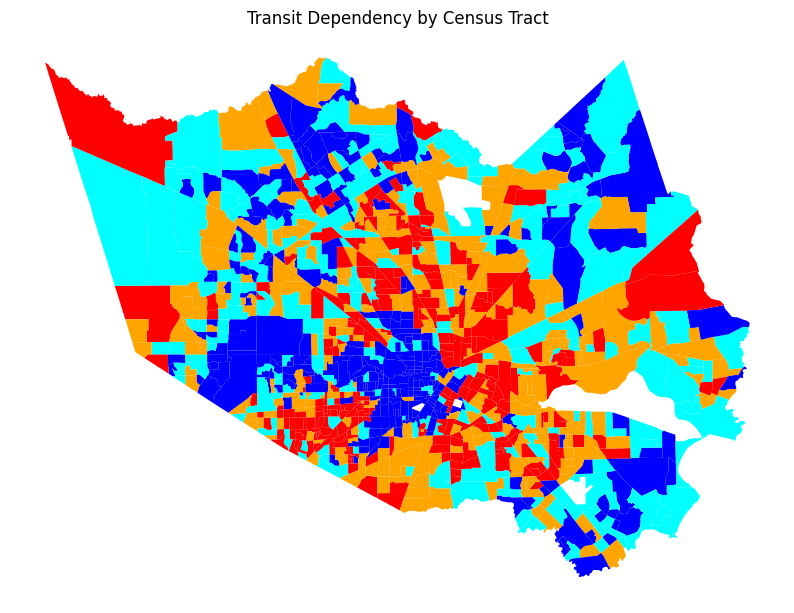

In [345]:
# Define the GeoDataFrame (you should replace this with your actual data loading code)
# Ensure 'quartile' column exists and contains the expected values
print(gdf['quartile'].value_counts())

# Define a color map for the quartiles
quartile_colors = {
    'Low': 'blue',
    'Moderate-Low': 'cyan',
    'Moderate-High': 'orange',
    'High': 'red'
}

# Plot the GeoDataFrame with the specified colors for quartiles
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

gdf.plot(column='quartile', 
         ax=ax, 
         legend=True,
         legend_kwds={'title': "Transit Dependency Quartiles"},
         color=[quartile_colors[q] for q in gdf['quartile']])

# Add a title and axes labels
ax.set_title('Transit Dependency by Census Tract')
ax.set_axis_off()

# Show the plot
plt.show()

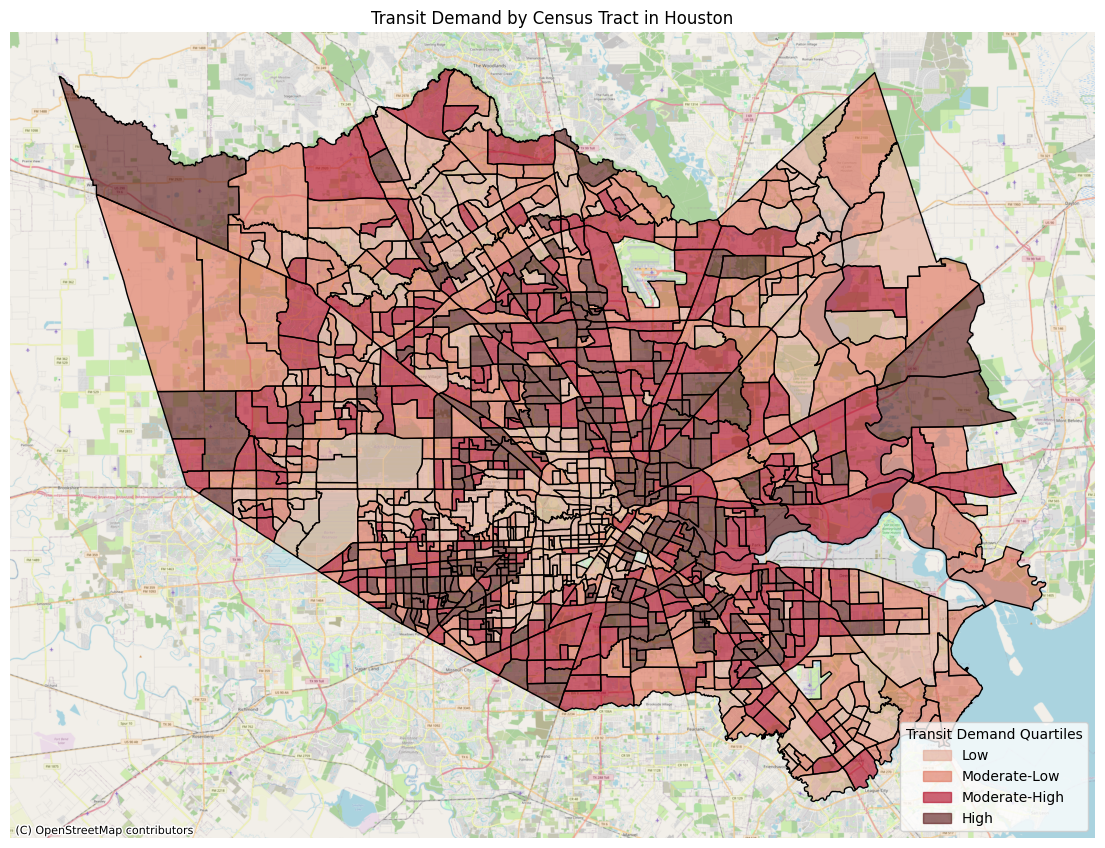

In [348]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import box
import matplotlib.patches as mpatches

# Load your GeoDataFrames (example paths, replace with your actual paths)
# gdf = gpd.read_file('path_to_your_gdf_shapefile')
# boundary = gpd.read_file('path_to_your_boundary_shapefile')

# Ensure both GeoDataFrames use the same CRS
boundary = boundary.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

# Get the bounding box of the city boundary
minx, miny, maxx, maxy = boundary.total_bounds

# Clip the GeoDataFrame to the city boundary
clip_box = box(minx, miny, maxx, maxy)
gdf = gdf[gdf.geometry.intersects(clip_box)]

# Define a color map for the quartiles
quartile_colors = {
    'Low': "#e1a69298",
    'Moderate-Low': "#de6e5698",
    'Moderate-High': "#b0001b98",
    'High': "#540f0f98"
}

# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(14, 14))

gdf.plot(ax=ax,
         legend=True,
         legend_kwds={'title': "Transit Demand Quartiles"},
         color=[quartile_colors[q] for q in gdf['quartile']],
         edgecolor='black')  # Add edgecolor to show tract boundaries

# Add a topographic basemap (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Add a legend with custom color patches
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in quartile_colors.items()]
ax.legend(handles=legend_handles, title='Transit Demand Quartiles', loc='lower right')

# Add a title and axes labels
ax.set_title('Transit Demand by Census Tract in Houston')
ax.set_axis_off()

# Show the plot
plt.show()


In [349]:
# Save the plot as a PNG file
fig.savefig('transit_dependency_map_houston.png', dpi=300, bbox_inches='tight')
